In [13]:
pip install cirq 

In [18]:
# import required libraries
import random
import time
import cirq
from cirq import H, X, CNOT, measure
import matplotlib.pyplot as plt



def main(n,decide):
    # Choose qubits to use.
    q = cirq.LineQubit.range(n+1)

    # Pick a secret n-bit function and create a circuit to query the oracle.
    secret_function = [random.randint(0, 1) for _ in range(n)]
    
    # Create a balanced or constant oracle depending on the deciding bit.
    oracle = make_oracle(q,n,secret_function,decide)
    print(f"Secret function:\nf(x) = <{', '.join(str(e) for e in secret_function)}>")

    # Embed the oracle into a quantum circuit querying it.
    circuit = make_deutsch_circuit(q,n, oracle)
    print('Circuit:')
    print(circuit)

    # Simulate the circuit
#    simulator = cirq.Simulator()
#    result = simulator.run(circuit)
    run_simulation(circuit,1024)
    
# Custom function used to respresent a a set of bits in string format
def bitstring(bits):
    return ''.join(str(int(b)) for b in bits)
def run_simulation(c,run_count):
  simulator = cirq.Simulator()
  result = simulator.run(c, repetitions=run_count)
  frequencies = result.histogram(key='result', fold_func=bitstring)
  print(f'Sampled results:\n{frequencies}')


  # Check if we actually found the secret value.
  most_common_bitstring = frequencies.most_common(1)[0][0]



def make_oracle(q,n, secret_function,decide):
    """Gates implementing the secret function f(x)."""
    
   
    # If deciding bit is 0, implement a balanced function, in this case it is a CNOT of each input bits with a predefined control bit in X basis, that hold the value 1
    if decide == 0:
      print()
      print("Should be a balanced function!")
      print()
      for i,j in enumerate(secret_function):

        if j == 1:
          yield cirq.X(q[i])

      for i in q[:n]:
        yield CNOT(i,q[n])


      for i,j in enumerate(secret_function):

        if j == 1:
          yield cirq.X(q[i])
    
    # If the deciding bit is 1, we implement a balanced function 
    else:
      print()
      print("Should be a constant function!")
      print()
    

    


def make_deutsch_circuit(q,n,oracle):
    c = cirq.Circuit()

    # Initialize input qubits
    c.append( cirq.H.on_each(q[:n])) 
    # Initialize output qubits
    c.append(cirq.X(q[n]) )
    c.append(cirq.H(q[n]) )

    # Query oracle
    c.append(oracle)

    # Measure in H basis
    c.append(cirq.H.on_each(q[:n]))
    c.append(cirq.measure(*q[:n], key="result"))
    return c




In [19]:
# Running the algorithm by altering the circuit for varied values of n, where n represents number of qubits & 
# Capturing time taken for the algorithm to run for each value of n for a balanced function

t=[]
decide = 0
for i in range(1,21):
    
    st=time.time()
    main(i,decide)
    end=time.time()
    t.append(end-st)




Secret function:
f(x) = <0>

Should be a balanced function!

Circuit:
0: ───H───────@───H───M('result')───
              │
1: ───X───H───X─────────────────────
Sampled results:
Counter({'1': 1024})
Secret function:
f(x) = <1, 0>

Should be a balanced function!

Circuit:
0: ───H───X───@───X───H───M('result')───
              │           │
1: ───H───────┼───@───H───M─────────────
              │   │
2: ───X───H───X───X─────────────────────
Sampled results:
Counter({'11': 1024})
Secret function:
f(x) = <0, 0, 1>

Should be a balanced function!

Circuit:
0: ───H───────@───H───────────────M('result')───
              │                   │
1: ───H───────┼───@───H───────────M─────────────
              │   │               │
2: ───H───X───┼───┼───@───X───H───M─────────────
              │   │   │
3: ───X───H───X───X───X─────────────────────────
Sampled results:
Counter({'111': 1024})
Secret function:
f(x) = <0, 0, 1, 0>

Should be a balanced function!

Circuit:
0: ───H───────@───H─────────────

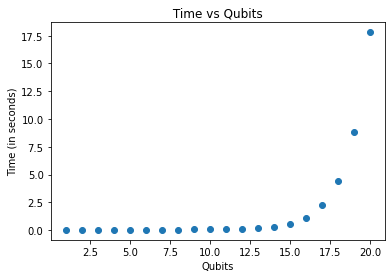

In [21]:
# Plotting the time taken by the algorithm against the number of qubits in the circuit to analyze scalability of the algorithm

plt.scatter(list(range(1,21)), t)
plt.xlabel('Qubits')
plt.ylabel('Time (in seconds)')
plt.title(" Time vs Qubits ")
plt.show()


In [22]:
# Running the algorithm by altering the circuit for varied values of n, where n represents number of qubits & 
# Capturing time taken for the algorithm to run for each value of n for a balanced function

t=[]
decide = 1
for i in range(1,21):
    
    st=time.time()
    main(i,decide)
    end=time.time()
    t.append(end-st)




Secret function:
f(x) = <0>

Should be a constant function!

Circuit:
0: ───H───H───M('result')───

1: ───X───H─────────────────
Sampled results:
Counter({'0': 1024})
Secret function:
f(x) = <0, 1>

Should be a constant function!

Circuit:
0: ───H───H───M('result')───
              │
1: ───H───H───M─────────────

2: ───X───H─────────────────
Sampled results:
Counter({'00': 1024})
Secret function:
f(x) = <0, 1, 0>

Should be a constant function!

Circuit:
0: ───H───H───M('result')───
              │
1: ───H───H───M─────────────
              │
2: ───H───H───M─────────────

3: ───X───H─────────────────
Sampled results:
Counter({'000': 1024})
Secret function:
f(x) = <0, 0, 0, 1>

Should be a constant function!

Circuit:
0: ───H───H───M('result')───
              │
1: ───H───H───M─────────────
              │
2: ───H───H───M─────────────
              │
3: ───H───H───M─────────────

4: ───X───H─────────────────
Sampled results:
Counter({'0000': 1024})
Secret function:
f(x) = <0, 1, 0, 1, 1

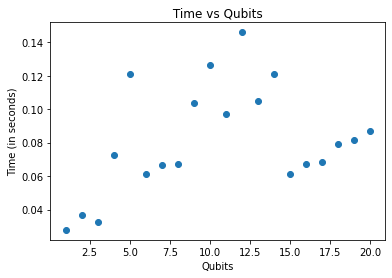

In [23]:
# Plotting the time taken by the algorithm against the number of qubits in the circuit to analyze scalability of the algorithm

plt.scatter(list(range(1,21)), t)
plt.xlabel('Qubits')
plt.ylabel('Time (in seconds)')
plt.title(" Time vs Qubits ")
plt.show()
